In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
airline=pd.read_csv("EastWestAirlines.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
#normalizatin function min max
def norm_func(i):
    x=(i-i.min())/(i-i.max()-(i-i.min()))
    return (x)

In [4]:
airline_norm=norm_func(airline.iloc[:,1:])
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.016508,-0.0,-0.00,-0.0,-0.0,-0.000660,-0.011628,-0.000000,-0.000000,-0.843742,-0.0
1,-0.011288,-0.0,-0.00,-0.0,-0.0,-0.000815,-0.023256,-0.000000,-0.000000,-0.839884,-0.0
2,-0.024257,-0.0,-0.00,-0.0,-0.0,-0.015636,-0.046512,-0.000000,-0.000000,-0.847842,-0.0
3,-0.008667,-0.0,-0.00,-0.0,-0.0,-0.001896,-0.011628,-0.000000,-0.000000,-0.837955,-0.0
4,-0.057338,-0.0,-0.75,-0.0,-0.0,-0.164211,-0.302326,-0.067398,-0.075472,-0.835905,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.010837,-0.0,-0.00,-0.0,-0.0,-0.032330,-0.046512,-0.006490,-0.018868,-0.168917,-1.0
3995,-0.037766,-0.0,-0.00,-0.0,-0.0,-0.003720,-0.058140,-0.000000,-0.000000,-0.167953,-1.0
3996,-0.043169,-0.0,-0.50,-0.0,-0.0,-0.096505,-0.093023,-0.000000,-0.000000,-0.168797,-1.0
3997,-0.032202,-0.0,-0.00,-0.0,-0.0,-0.001896,-0.011628,-0.016225,-0.018868,-0.168676,-0.0


KMEANS CLUSTERING

ELBOW CURVE

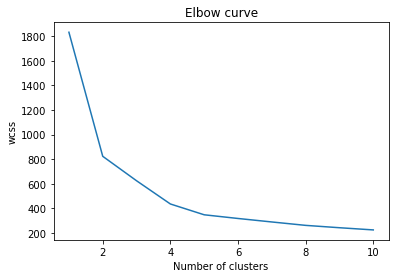

In [5]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airline_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [6]:
#selecting no of clusters from the above elbow curve which is optimum number of clusters
airline_km = KMeans(n_clusters=4).fit(airline_norm)
airline_km

KMeans(n_clusters=4)

In [7]:
airline_km.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [8]:
airline_km = pd.Series(airline_km.labels_)
airline['cluster_km']=airline_km
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_km
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
